# Assignment #3

# 1. ArcAscii to NetCDF4 (50 points)

The directory `/shared_space/data/MSWEP/AAIGrid` contains spatial grids of the [MSWEP](http://www.gloh2o.org/) dataset at a 1 month temporal resolution and 1 arcdegree spatial resolution for 2015 in the AAIGrid format. Create a single NetCDF4 file with one 3D array (time,lat,lon) that contains this data. Ensure that the created NetCDF4 is CF-compliant by following the guidelines described [here](http://cfconventions.org/Data/cf-conventions/cf-conventions-1.7/cf-conventions.html#_netcdf_files_and_components). You can also use the ERA-Interim NetCDF4 file as an example (/shared_space/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc). 

In [1]:
import netCDF4 as nc
import os
import glob
import numpy as np
import datetime

os.chdir('/data/MSWEP/AAIGrid')
data = glob.glob("*")
print(data)

#file = '/data/MSWEP/AAIGrid/2015_08.aaigrid'
#print(open(file).read())

flist = []
for thing in data:
    x = open(thing, 'r')
    for i, item in enumerate(x):
        if i < 6:
            continue
        if i >= 6:
            flist.append(item.split(' '))           

for i in range(len(flist)):
    flist[i][360] = '-9999'
    flist[i] = flist[i][1:361]    
    flist[i] = [float(it) for it in flist[i]]

#for idx, item in enumerate(z[i]):
#z[i][idx] = float()
        
flist = np.array(flist).ravel()
print(len(flist))
flist = flist.reshape(12, 180, 360)
print(len(flist))
print(flist.shape[1])
#12. 180. 160

file1 = '/home/jovyan/work/formal.nc'
os.system('rm -f %s' % file1)
#Open the file as writable
fp1 = nc.Dataset(file1, 'w')
fp1.createDimension('time', size = flist.shape[0])
fp1.createDimension('lon', size = flist.shape[1])
fp1.createDimension('lat', size = flist.shape[2])
fp1.createVariable('flist', 'f4', dimensions=('time','lon','lat'))
fp1['flist'][:] = flist[:]
print(fp1)
print(fp1['flist'])
fp1.close()

['2015_08.aaigrid', '2015_12.aaigrid', '2015_09.aaigrid', '2015_06.aaigrid', '2015_02.aaigrid', '2015_03.aaigrid', '2015_10.aaigrid', '2015_04.aaigrid', '2015_07.aaigrid', '2015_01.aaigrid', '2015_05.aaigrid', '2015_11.aaigrid']
777600
12
180
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(12), lon(180), lat(360)
    variables(dimensions): float32 flist(time,lon,lat)
    groups: 

<class 'netCDF4._netCDF4.Variable'>
float32 flist(time, lon, lat)
unlimited dimensions: 
current shape = (12, 180, 360)
filling on, default _FillValue of 9.969209968386869e+36 used



# 2. Showing elevation at multiple zoom levels (50 points)

Using the file `/shared_space/data/NED/dem_lat3536_lon-80-79.tif`, reverse engineer the code that created the following figure (Hint: You will want to use matplotlib.patches).

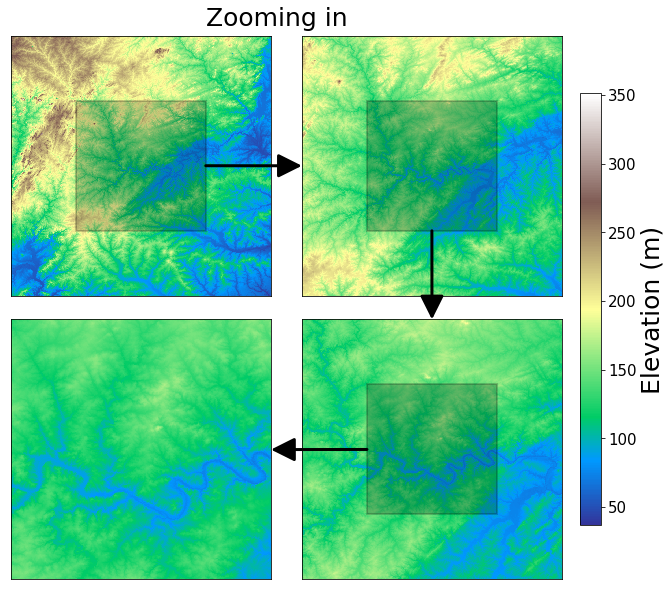

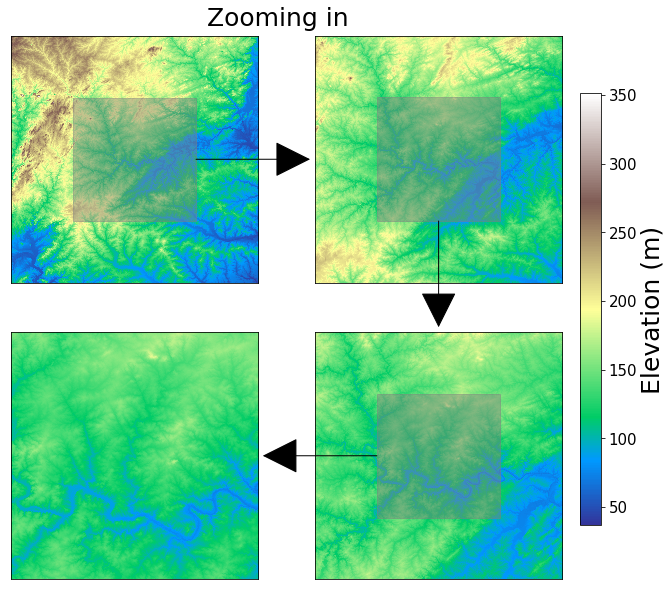

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import rasterio

file = '/data/NED/dem_lat3536_lon-80-79.tif'
fp = rasterio.open(file)
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1).axis('on')
plt.imshow(fp.read(1),cmap=plt.get_cmap('terrain'))
axe1 = plt.gca()
plt.xticks(())
plt.yticks(())
rect = plt.Rectangle((900, 900), 1800, 1800, edgecolor = 'grey', facecolor = 'grey', alpha = 0.45)
axe1.add_patch(rect)
plt.subplot(2,2,2).axis('on')
plt.imshow(fp.read(1),cmap=plt.get_cmap('terrain'))
plt.xlim([900,2700]);plt.ylim([2700,900]) 
axe2 = plt.gca()
rect = plt.Rectangle((900+(2700-900)/4, 900+(2700-900)/4), (2700-900)/2, (2700-900)/2, edgecolor = 'grey', facecolor = 'grey', alpha = 0.45)
axe2.add_patch(rect)
plt.xticks(())
plt.yticks(())
plt.subplot(2,2,4).axis('on')
plt.imshow(fp.read(1),cmap=plt.get_cmap('terrain'))
plt.xlim([1250,2250]);plt.ylim([2250,1250])
axe3 = plt.gca()
rect = plt.Rectangle((1250+(2250-1250)/4, 1250+(2250-1250)/4), (2250-1250)/2, (2250-1250)/2, edgecolor = 'grey', facecolor = 'grey', alpha = 0.45)
axe3.add_patch(rect)
plt.xticks(())
plt.yticks(())
plt.subplot(2,2,3).axis('on')
im = plt.imshow(fp.read(1),cmap=plt.get_cmap('terrain'))
plt.xlim([1500,2000]);plt.ylim([2000,1500])
axe4 = plt.gca()
plt.xticks(())
plt.yticks(())
cb_ax = fig.add_axes([0.92, 0.2, 0.03, 0.6])
cb = fig.colorbar(im, cax = cb_ax)
cb.ax.tick_params(labelsize=15)
cb.set_label('Elevation (m)',fontsize=25)
xyA = (2700, 1800)
xyB = (900, 1800)
arrow1 = patches.ConnectionPatch(xyA, xyB, "data", "data", axesA=axe1, axesB=axe2, arrowstyle="-|>", mutation_scale=80, shrinkB=5, color = 'black')
axe1.add_artist(arrow1)
xy1 = (1800, 2250)
xy2 = (1750, 1250)
arrow2 = patches.ConnectionPatch(xy1, xy2, "data", "data", axesA=axe2, axesB=axe3, arrowstyle="-|>", mutation_scale=80, shrinkB=5, color = 'black')
axe2.add_artist(arrow2)
xyC = (1500, 1750)
xyD = (2000, 1750)
arrow3 = patches.ConnectionPatch(xyC, xyD, "data", "data", axesA=axe3, axesB=axe4, arrowstyle="-|>", mutation_scale=80, shrinkB=5, color = 'black')
axe3.add_artist(arrow3)
plt.suptitle('Zooming in', x=0.5, y=0.92, fontsize = 25)
plt.show()

# 3. Optional bonus problem: Movie of the time evolution of global annual precipitation (25 points)

Using the file /shared_space/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc:

* Upscale the montly precipitation to an annual time step.
* Use the assembled annual precipitation dataset to create a movie of the time evolution of global precipitation between 1979 and 2015.

The following example will show you how to make a movie in a Jupyter Notebook: http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/. [Hint: You will need to use ax.imshow() instead of ax.line()]. 


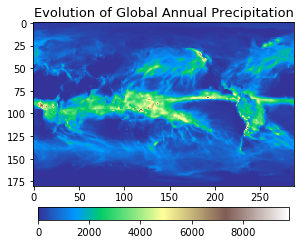

In [2]:
import netCDF4 as nc
import rasterio
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc'
fp = nc.Dataset(file, 'r')

fdict = {}
times = fp['time']
fdict['times'] = nc.num2date(times[:], units = times.units, calendar = times.calendar)
precips = fp['precip'][:]
fdict['precips'] = 365 * precips

ftime = []
fprecip=[]
for i in range(len(fdict['precips'])):
    x = []
    x.append(fdict['precips'][i,:,:])
    if i % 12 == 11:
        fprecip.append(np.mean((x),axis = 0))
        ftime.append(fdict['times'][i])
afprecip = np.array(fprecip)

fig, ax = plt.subplots()
im = plt.imshow(np.flipud(afprecip[0,:,:]), cmap = 'terrain')
cb = plt.colorbar(pad = 0.1, shrink = 0.75, orientation = 'horizontal')
cb.ax.tick_params(labelsize = 10)
plt.title('Evolution of Global Annual Precipitation', fontsize = 13)
plt.show()

def movie(stuff):
    im.set_data(np.flipud(afprecip[stuff,:,:]))
    return(im,)

anim = animation.FuncAnimation(fig, movie, frames = 36, interval = 200, blit = True)
HTML(anim.to_html5_video())